In [198]:
#Task 3 Edge Detector
from scipy import misc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import matplotlib.image as mpimg
import random as rnd
import matplotlib.mlab as mlab
from skimage import io, color
import math


%matplotlib inline
    

img = mpimg.imread('./HW1/Images/Q1/cameraman.jpg')

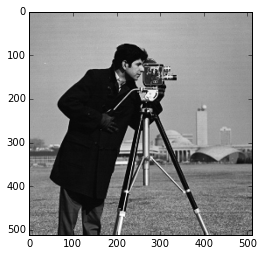

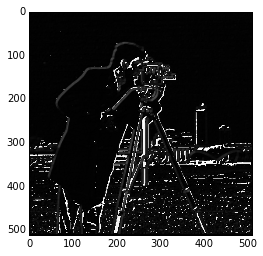

In [197]:
w,h,d = tuple(img.shape)
img2 = np.zeros((w,h,d))


#Applies Prewitt Filter        
for y in range(1,h-2):
    for x in range(1,w-2):
        
        #Applies Prewitt Horizontal filter
        value = ((img[y][x][0]*-1)+(img[y][x+1][0]*0)+(img[y][x+2][0])  
                 +(img[y+1][x][0]*-1)+(img[y+1][x+1][0]*0)+(img[y+1][x+2][0])  
                 +(img[y+2][x][0]*-1)+(img[y+2][x+1][0]*0)+(img[y+2][x+2][0]))/9
        
        #Applies Prewitt Vertical filter
        value2 = ((img[y][x][0]*-1)+(img[y][x+1][0]*-1)+(img[y][x+2][0]*-1)  
                 +(img[y+1][x][0]*0)+(img[y+1][x+1][0]*0)+(img[y+1][x+2][0]*0)  
                 +(img[y+2][x][0])+(img[y+2][x+1][0])+(img[y+2][x+2][0]))/9
        
        #Combines results
        img2[y][x][0] = value + value2
        img2[y][x][1] = value + value2 
        img2[y][x][2] = value + value2
  
        
#Applies threshold
threshold = 100
for i in range(1,h-1):
    for j in range(1,w-1):
        value = img2[i][j][0]
        if abs(value)>threshold: 
            value = 255
        else: 
            value = 1
        
        img2[i][j][0] 

#Denoises by checking that the min value is at least within range
for i in range(1,h-2):
    for j in range(1,w-2):
        pixelList = []
        for i2 in range(3):
            for j2 in range(3):
                pixelList.append(img2[i+i2][j+j2][0])
        
        value = min(pixelList)
        
        img2[i][j][0] = value 
        img2[i][j][1] = value
        img2[i][j][2] = value

plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(img2)

